In [8]:
import requests, json
import pandas as pd
import numpy as np
import decimal
import time
from datetime import datetime, timedelta
from rich import print
import os, math
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

api_key= os.getenv('taostats_api')

headers = {
            "accept": "application/json",
            "Authorization": api_key
        }
#colours
ts_teal = '#00DBBC'
ts_red ='#EB5347'
ts_yellow ='#EBC247'
ts_orange ='#FF8B25'
ts_purple ='#D65BB3'
ts_lblue ='#47C6EB'
ts_fusia ='#E82166'
ts_lime ='#BAEB47'
ts_sand ='#EB7347'
ts_dpurple ='#9747FF'
ts_pblue ='#87FFEE'
ts_dgreen ='#007564'
ts_gray ='#909090'
ts_green ='#00B20F'
ts_brown ='#BD7536'
ts_rblue ='#008BDB'
#plot in dark mode
plt.style.use('dark_background')

In [19]:
netuid = 75

market_caps = {}
market_caps_tao = {}
tao_prices = {}
url = "https://api.taostats.io/api/price/ohlc/v1?asset=tao&period=1d&page=1&limit=200"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
prices = resJson['data']
for price in prices:
    close = float(price['close'])
    timestamp = price['timestamp']
    date = datetime.fromisoformat(timestamp.replace("Z", "+00:00")).strftime("%m-%d")
    tao_prices[date] = close


url = f"https://api.taostats.io/api/dtao/pool/history/v1?netuid={netuid}&frequency=by_day&page=1&limit=200"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
caps = resJson['data']
for cap in caps:
    timestamp = cap['timestamp']
    date = datetime.fromisoformat(timestamp.replace("Z", "+00:00")).strftime("%m-%d")
    price = float(cap['price'])
    total_alpha = float(cap['total_alpha'])/1e9
    mkcap = price*total_alpha
    market_caps[date] = mkcap

    mkcap_tao = 0
    if date in tao_prices:
        mkcap_tao = mkcap*tao_prices[date]
        market_caps_tao[date] = mkcap_tao



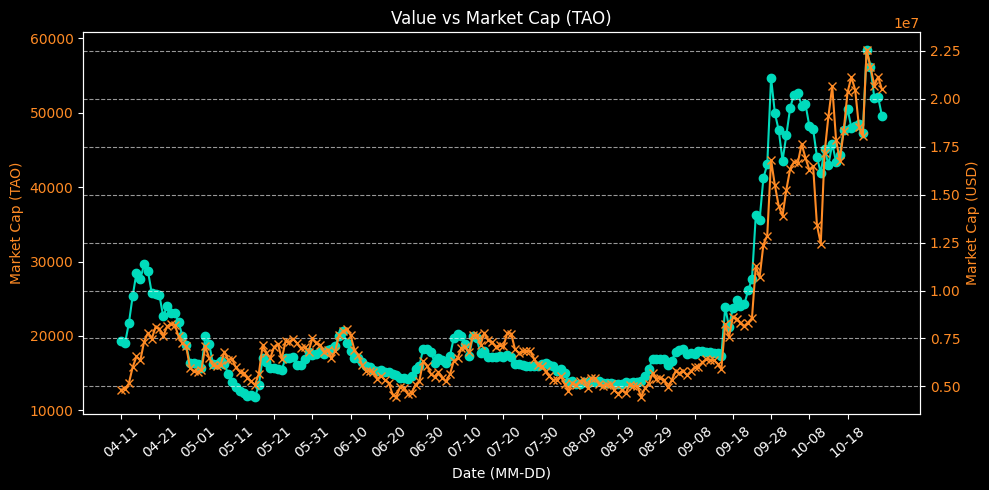

In [29]:
# Sort by date
data=market_caps
sorted_items = sorted(data.items(), key=lambda x: x[0])

# Extract dates and values
dates = [d for d, _ in sorted_items]
values = [v for _, v in sorted_items]

# Match market cap values to same dates
market_values = [market_caps_tao.get(d, None) for d, _ in sorted_items]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis (main values)
ax1.plot(dates, values, color=ts_teal, marker='o', label='Value')
ax1.set_xlabel("Date (MM-DD)")
ax1.set_ylabel("Market Cap (TAO)", color=ts_orange)
ax1.tick_params(axis='y', labelcolor=ts_orange)

# Right y-axis (market cap)
ax2 = ax1.twinx()
ax2.plot(dates, market_values, color=ts_orange, marker='x', label='Market Cap (USD)')
ax2.set_ylabel("Market Cap (USD)", color=ts_orange)
ax2.tick_params(axis='y', labelcolor=ts_orange)

# X-axis formatting
ax1.set_xticks(range(0, len(dates), 10))  # change 1 → 20 if too many labels
ax1.set_xticklabels([dates[i] for i in range(0, len(dates), 10)], rotation=40)

plt.title("Value vs Market Cap (TAO)")
plt.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()